# Logitic Regression

In [36]:
import pandas as pd
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.cross_validation import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.grid_search import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.preprocessing import binarize
from sklearn.cross_validation import cross_val_score

In [11]:
maldata=pd.read_csv('./malware.csv',sep='|')

x=maldata.drop(['Name', 'md5', 'legitimate'], axis=1).values
y=maldata['legitimate'].values
print(x.shape)


feature_select_model=ExtraTreesClassifier()
feature_select_model.fit(x,y)
model = SelectFromModel(feature_select_model, prefit=True)
x=model.transform(x)
print(x.shape)

number_of_samples=len(y)

random_indices=np.random.permutation(number_of_samples)

num_train=int(number_of_samples*0.7)
num_test=int(number_of_samples*0.30)

x_train=x[random_indices[:num_train]]
y_train=y[random_indices[:num_train]]

x_test=x[random_indices[num_train:]]
y_test=y[random_indices[num_train:]]

model=LogisticRegression()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)

(138047, 54)
(138047, 14)


## Accuracy

In [14]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred)*100)

30.1634214186


## Null Accuracy

In [15]:
print(max(y_test.mean(), 1 - y_test.mean())*100)

69.8365785814


## Confusion Matrix

In [25]:
print(metrics.confusion_matrix(y_test, y_pred))
confusion = metrics.confusion_matrix(y_test, y_pred)
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]


# Accuracy
print('Accuracy:',(TP+TN)/float(TP+TN+FP+FN)*100)

#Misclassification
print('Misclassification:',(FP+FN)/float(TP+TN+FP+FN)*100)

#Sensitivity
print('Sensitivity:',(TP)/float(TP+FN)*100)

#Specificity
print('Specificty:',(TN)/float(TN+FP)*100)

#Flase Positive Rate
print('False Positive:',(FP)/float(TN+FP)*100)

#Precision Score
print('Precision Score:', (TP)/float(TP+FP)*100)

[[    0 24102]
 [    0 10410]]
Accuracy: 30.1634214186
Misclassification: 69.8365785814
Sensitivity: 100.0
Specificty: 0.0
False Positive: 100.0
Precision Score: 30.1634214186


## ROC-AUC

0.5
0.951657510716


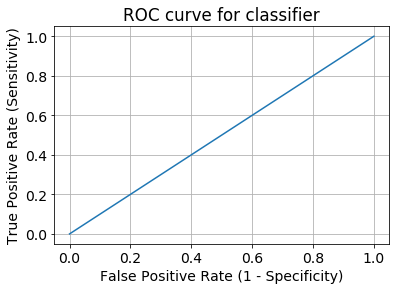

In [52]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
plt.plot(fpr, tpr)
plt.title('ROC curve for classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

print(metrics.roc_auc_score(y_test, y_pred))
print(cross_val_score(model, x, y, cv=10, scoring='roc_auc').mean())

## Threshold Selection

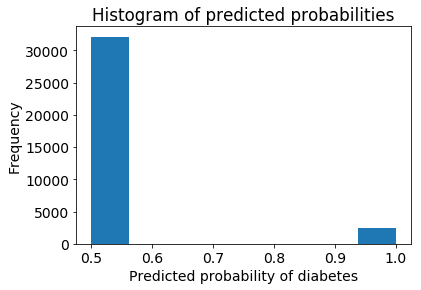

In [51]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['font.size'] = 14

y_pred_prob = model.predict_proba(x_test)[:, 1]
plt.hist(y_pred_prob, bins=8)
plt.title('Histogram of predicted probabilities')
plt.xlabel('Predicted probability of diabetes')
plt.ylabel('Frequency')

In [49]:
y_pred_new = binarize([y_pred_prob], 0.7)[0]
print(y_pred)
print(y_pred_new)

[ 1.  1.  1. ...,  1.  1.  1.]
[ 0.  0.  0. ...,  0.  0.  0.]


In [50]:
def evaluate_threshold(threshold):
    print('Sensitivity:', tpr[thresholds > threshold][-1])
    print('Specificity:', 1 - fpr[thresholds > threshold][-1])
    
print(evaluate_threshold(0.7))

Sensitivity: 1.0
Specificity: 0.0
None


## Grid Search

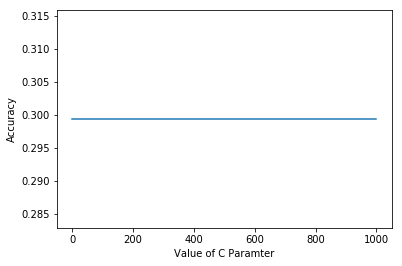

0.2993400798278847
{'C': 0.001}
LogisticRegression(C=0.001, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)


In [4]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000] }

model=LogisticRegression(penalty='l2')
grid=GridSearchCV(model,param_grid,cv=10,scoring='accuracy')
grid.fit(x,y)

grid_mean_scores= [result.mean_validation_score for result in grid.grid_scores_]
C=[0.001, 0.01, 0.1, 1, 10, 100, 1000]
plt.plot(C,grid_mean_scores)
plt.xlabel('Value of C Paramter')
plt.ylabel('Accuracy')
plt.show()

print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)